In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set()
from scipy.stats import multivariate_normal
from copy import deepcopy

# 1 K-means

In [2]:
# Parameters for generating two-cluster data
mu1 = (0,0)
s1x,s1y,r1 = 1,1,0
cov1 = [[s1x,r1*np.sqrt(s1x*s1y)],\
        [r1*np.sqrt(s1x*s1y),s1y]]
mu2 = (5,6)
s2x,s2y,r2 = 1,2,-.05
cov2 = [[s2x,r2*np.sqrt(s2x*s2y)],\
        [r2*np.sqrt(s2x*s2y),s2y]]

In [3]:
# Generating data
np.random.seed(8787)
cluster1 = multivariate_normal.rvs(mu1,cov1,size=50)
np.random.seed(1069)
cluster2 = multivariate_normal.rvs(mu2,cov2,size=70)
# Mergering the two
cluster = np.append(cluster1,cluster2,axis=0)
# Initial points for 2-means
p1,p2=np.array([[-2,8],[6,-2]])

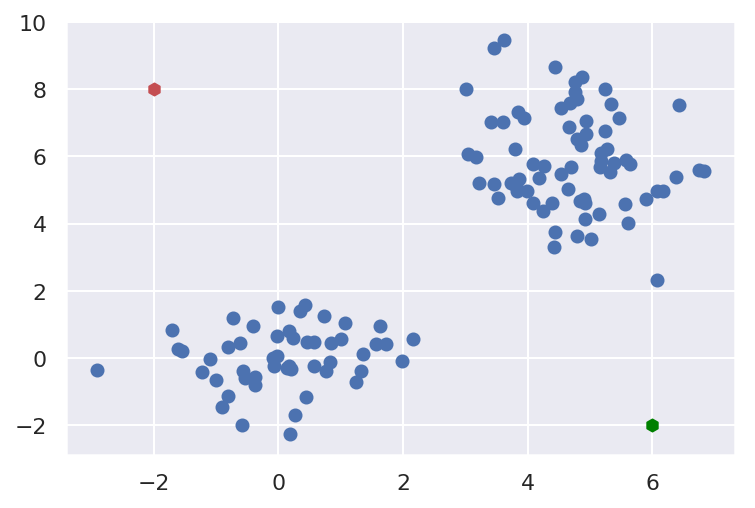

In [4]:
plt.scatter(cluster.T[0],cluster.T[1])
plt.scatter(p1[0],p1[1],marker="h",c="r")
plt.scatter(p2[0],p2[1],marker="h",c="green")

In [5]:
# Perform K-means
for it in range(3):
    # calculate distance
    dist1=np.linalg.norm(cluster-p1,axis=1)
    dist2=np.linalg.norm(cluster-p2,axis=1)
    
    # Gathering clusters
    ga1=cluster[dist1<dist2]
    ga2=cluster[dist1>dist2]
    
    # Update mean
    p1 = np.mean(ga1,axis=0)
    p2 = np.mean(ga2,axis=0)

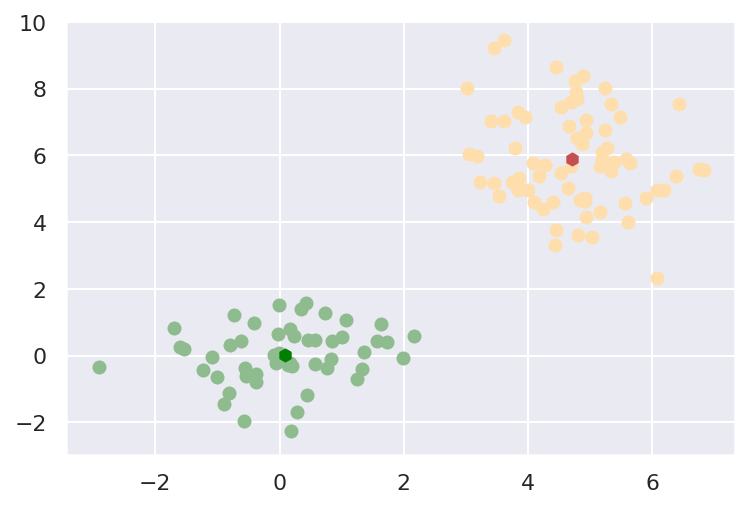

In [7]:
plt.scatter(ga1.T[0],ga1.T[1],c="navajowhite")
plt.scatter(ga2.T[0],ga2.T[1],c="darkseagreen")
plt.scatter(p1[0],p1[1],marker="h",c="r")
plt.scatter(p2[0],p2[1],marker="h",c="green")

## 1.1 Where K-means failed

In [8]:
# Given the params for generating two clusters
mu1 = (0,1)
s1x,s1y,r1 = 0.1,7,.1
cov1 = [[s1x,r1*np.sqrt(s1x*s1y)],\
        [r1*np.sqrt(s1x*s1y),s1y]]
mu2 = (2.7,3.8)
s2x,s2y,r2 = 0.1,9,-.15
cov2 = [[s2x,r2*np.sqrt(s2x*s2y)],\
        [r2*np.sqrt(s2x*s2y),s2y]]

In [9]:
# Generating data
np.random.seed(8787)
cluster1 = multivariate_normal.rvs(mu1,cov1,size=50)
np.random.seed(1069)
cluster2 = multivariate_normal.rvs(mu2,cov2,size=70)
# Mergering the two
cluster = np.append(cluster1,cluster2,axis=0)
np.random.seed(5210)
p1,p2=np.array([[-1,5],[3,-2]])

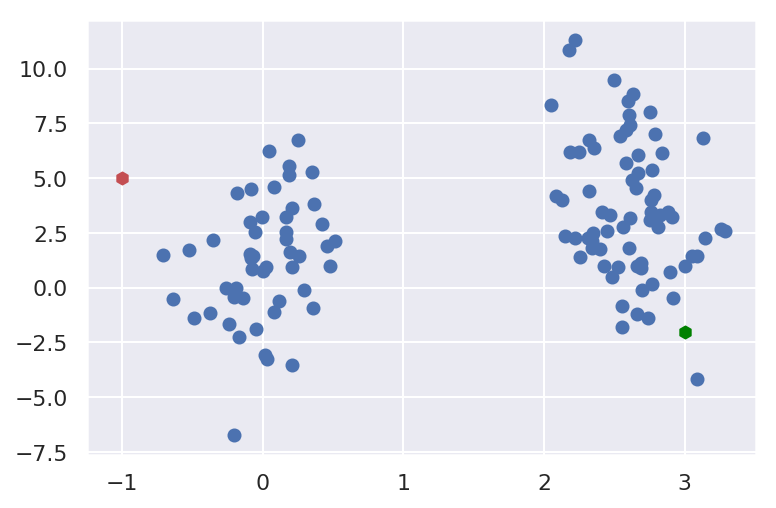

In [10]:
plt.scatter(cluster.T[0],cluster.T[1])
plt.scatter(p1[0],p1[1],marker="h",c="r")
plt.scatter(p2[0],p2[1],marker="h",c="green")

In [11]:
# Performing K-means
for it in range(5):
    # calculate distance
    dist1=np.linalg.norm(cluster-p1,axis=1)
    dist2=np.linalg.norm(cluster-p2,axis=1)
    
    # Gathering clusters
    ga1=cluster[dist1<dist2]
    ga2=cluster[dist1>dist2]
    
    # Update mean
    p1 = np.mean(ga1,axis=0)
    p2 = np.mean(ga2,axis=0)

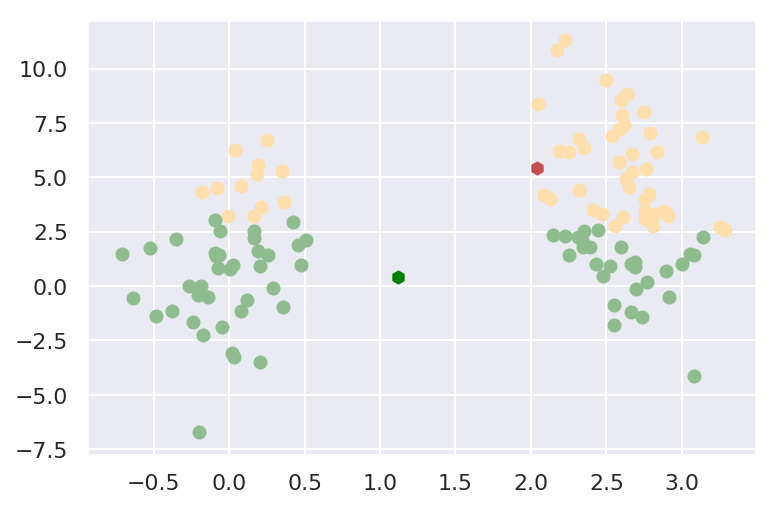

In [12]:
plt.scatter(ga1.T[0],ga1.T[1],c="navajowhite")
plt.scatter(ga2.T[0],ga2.T[1],c="darkseagreen")
plt.scatter(p1[0],p1[1],marker="h",c="r")
plt.scatter(p2[0],p2[1],marker="h",c="green")

# 2 EM algorithm

In [25]:
# Parameters the same as Sec. 1.1
mu1 = (0,1)
s1x,s1y,r1 = 0.1,7,.1
cov1 = [[s1x,r1*np.sqrt(s1x*s1y)],\
        [r1*np.sqrt(s1x*s1y),s1y]]
mu2 = (2.7,3.8)
s2x,s2y,r2 = 0.1,9,-.15
cov2 = [[s2x,r2*np.sqrt(s2x*s2y)],\
        [r2*np.sqrt(s2x*s2y),s2y]]

# Generating data
np.random.seed(8787)
cluster1 = multivariate_normal.rvs(mu1,cov1,size=50)
np.random.seed(1069)
cluster2 = multivariate_normal.rvs(mu2,cov2,size=70)
# Mergering the two
cluster = np.append(cluster1,cluster2,axis=0)
np.random.seed(5210)
p1,p2=np.array([[-1,5],[3,-2]])

In [26]:
# Initializing parameters for EM
sigma1,sigma2 = np.eye(2),np.eye(2)
pi1 = 0.5
pi2 = 1-pi1
N = len(cluster)
# Creating lists for storing mu_k that is used to calculating stop criterion
p1_list = [deepcopy(p1)]
p2_list = [deepcopy(p2)]

In [27]:
# Performing EM algorithm
max_iters = 100
for iters in range(max_iters):
    # E-step: evaluating responsibilities
    k1 = pi1*multivariate_normal.pdf(cluster,p1,sigma1)
    k2 = pi2*multivariate_normal.pdf(cluster,p2,sigma2)
    gamma1 = k1/(k1+k2)
    gamma2 = k2/(k1+k2)

    # M-step: Re-estimate parameters that maximizes expectation
    # Re-evaluating N_k 
    N1,N2 = np.sum(gamma1),np.sum(gamma2)

    # Re-evaluating mean mu_k
    p1 = np.sum(((cluster.T)*gamma1).T,axis=0)/N1
    p2 = np.sum(((cluster.T)*gamma2).T,axis=0)/N2
    p1_list.append(deepcopy(p1))
    p2_list.append(deepcopy(p2))

    # Re-evaluating pi_k
    pi1=N1/N
    pi2=N2/N

    # Re-evaluating covariance matrix
    sigma1,sigma2 = [],[]
    for i in range(N):
        sigma1.append(gamma1[i]*np.outer((cluster[i]-p1),(cluster[i]-p1)))
        sigma2.append(gamma2[i]*np.outer((cluster[i]-p2),(cluster[i]-p2)))
    sigma1 = np.sum(sigma1,axis=0)/N1
    sigma2 = np.sum(sigma2,axis=0)/N2
    
    # Stop criterion
    p1_change = np.sum((p1-p1_list[-2])**2)**0.5
    p2_change = np.sum((p2-p2_list[-2])**2)**0.5
    if (p1_change<0.01) & (p2_change<0.01):
        print("Stop criterion met at %d iterations."%(iters+1))
        break
    else:
        pass

Stop criterion met at 23 iterations.


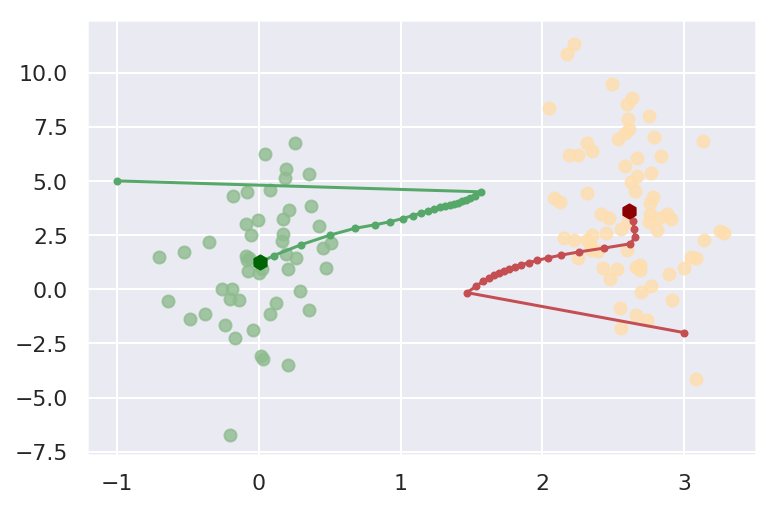

In [28]:
plt.scatter(cluster.T[0][gamma1>0.5],cluster.T[1][gamma1>0.5],c="darkseagreen",alpha=0.8)
plt.scatter(cluster.T[0][gamma2>0.5],cluster.T[1][gamma2>0.5],c="navajowhite",alpha=0.8)
plt.scatter(p1[0],p1[1],c="darkgreen",marker="h",zorder=2,s=50)
plt.scatter(p2[0],p2[1],c="darkred",marker="h",zorder=2,s=50)
plt.plot(np.array(p1_list).T[0],np.array(p1_list).T[1],".-g",zorder=1)
plt.plot(np.array(p2_list).T[0],np.array(p2_list).T[1],".-r",zorder=1)